In [9]:
import numpy as np
import matplotlib.pyplot as plt
from kernel import Kernel

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
%matplotlib inline
plt.rcParams['text.usetex'] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = "Times"
plt.rc('text', usetex=True)

In [12]:
np.random.seed(0)

In [13]:
def target_func(x, omega, phi):
    return np.sin(omega * x[:, np.newaxis] + phi[np.newaxis, :])

def generate_random_sphere(n_train, m):
    u = np.random.randn(n_train, m)
    u /= np.sqrt(np.sum(u**2, axis=1))[:, np.newaxis]
    return u

def generate_random_coordinate(n_train, m):
    u = np.random.randn(n_train, m)
    return (u == u.max(axis=1)[:, np.newaxis]).astype(float)

def get_stepsize(T, gamma_0=1):
    gamma = np.arange(T, dtype=float)
    gamma += 1
    np.sqrt(gamma, out=gamma)
    np.divide(1, gamma, out=gamma)
    gamma *= gamma_0
    return gamma

m = 30
phi = 2 * np.pi * np.random.rand(m)
omega = 2 * np.pi * np.random.randn(m)[np.newaxis, :]

n_train = int(1e4)
gamma_0 = 1
gamma = get_stepsize(n_train, gamma_0)

sigma = .2
kernel = Kernel('gaussian', sigma=sigma)

n_test = 100
x_test = np.linspace(0, 1, n_test, dtype=np.float32)
y_test = target_func(x_test, omega, phi)

x_train = np.random.rand(n_train)
y_train = target_func(x_train, omega, phi)
u = generate_random_sphere(n_train, m)
u_coor = generate_random_coordinate(n_train, m)

kernel.set_support(x_train[:, np.newaxis])
K = kernel(x_train[:, np.newaxis])
k_test = kernel(x_test[:, np.newaxis]).T

In [14]:
alpha = np.zeros((n_train, m), float) + 1 / n_train
alpha_coor = np.zeros((n_train, m), float) + 1 / n_train
err = np.zeros(n_train, float)
err_coor = np.zeros(n_train, float)

for i in range(n_train):
    epsilon = np.sign(np.dot(K[i, :i+1] @ alpha[:i+1] - y_train[i], u[i]))
    alpha[i] -= epsilon * gamma[i] * u[i]

    epsilon_coor = np.sign(np.dot(K[i, :i+1] @ alpha_coor[:i+1] - y_train[i], u_coor[i]))
    alpha_coor[i] -= epsilon_coor * gamma[i] * u_coor[i]
    
    err[i] = np.sqrt(((k_test[:, :i+1] @ alpha[:i+1] - y_test) ** 2).sum(axis=1)).mean()
    err_coor[i] = np.sqrt(((k_test[:, :i+1] @ alpha_coor[:i+1] - y_test) ** 2).sum(axis=1)).mean()

y_pred = k_test @ alpha
y_pred_coor = k_test @ alpha_coor

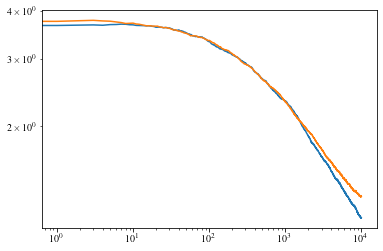

In [15]:
fig, ax = plt.subplots(1, 1)
ax.plot(err)
ax.plot(err_coor)
ax.set_xscale('log')
ax.set_yscale('log')

/var/folders/yg/djxj05p562nc92kcrz6sfj3c0000gn/T/ipykernel_6265/3942018248.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(1, 1)


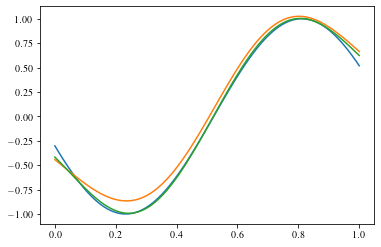

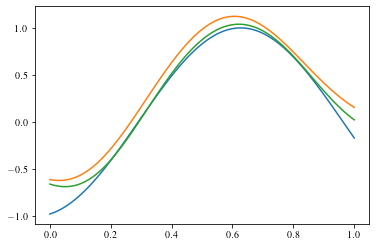

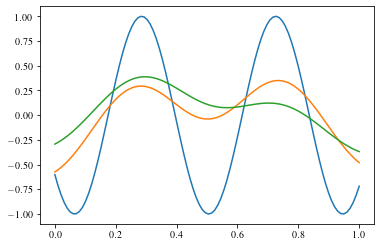

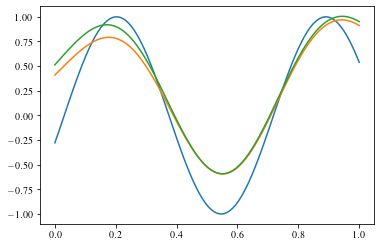

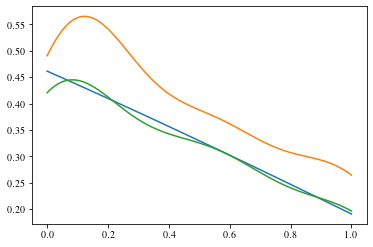

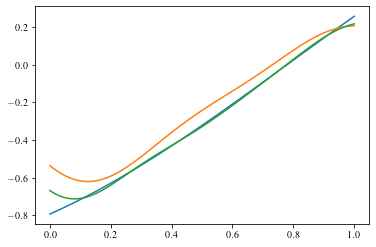

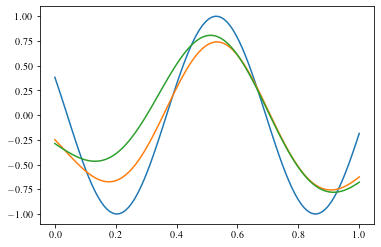

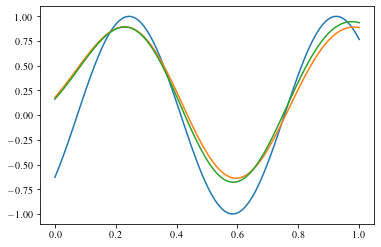

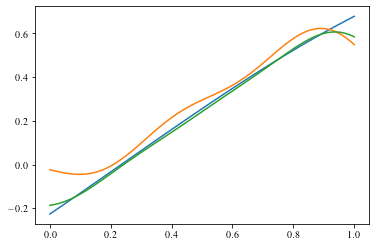

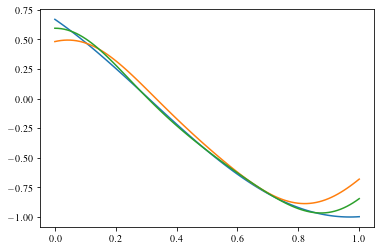

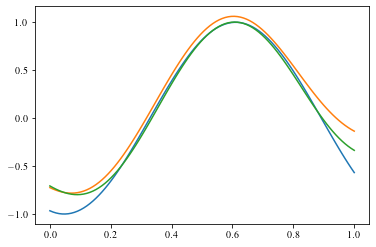

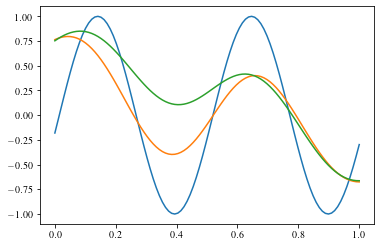

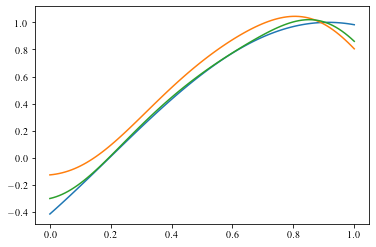

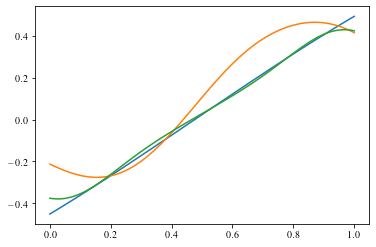

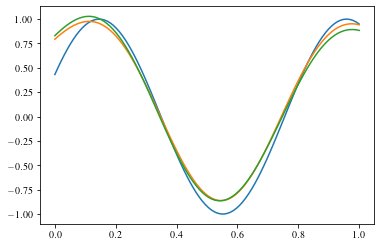

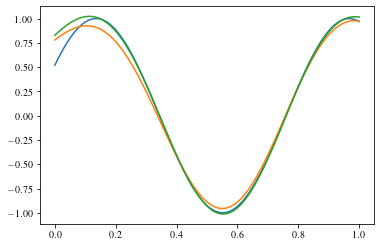

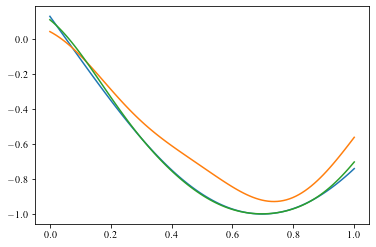

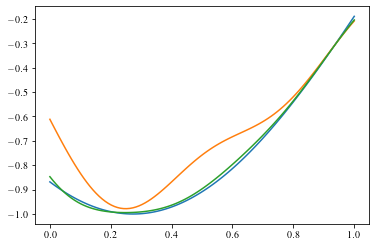

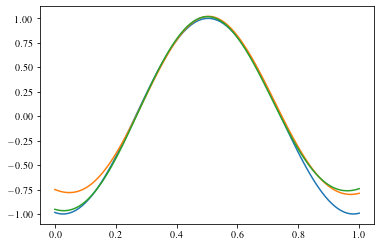

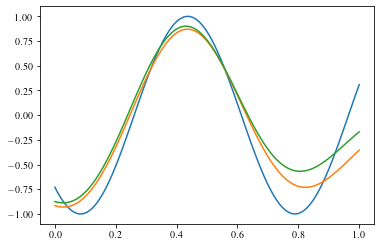

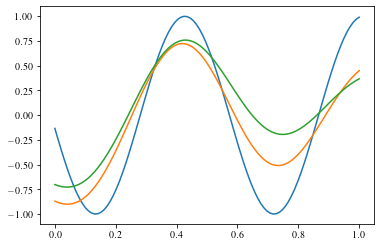

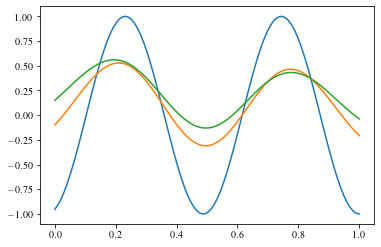

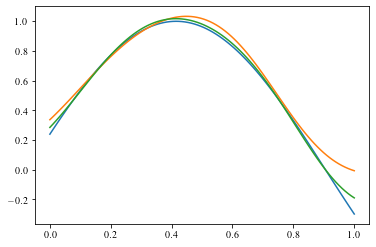

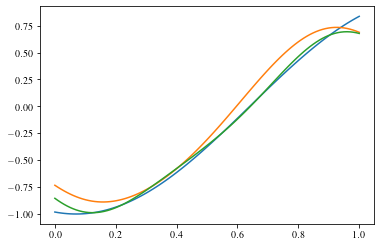

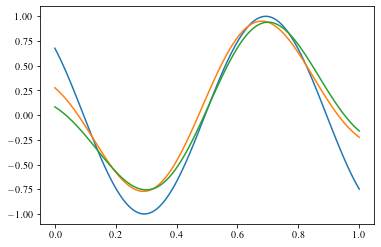

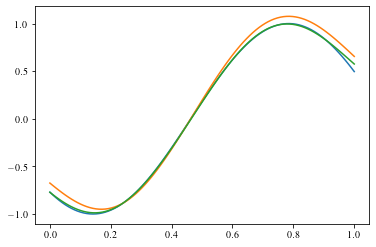

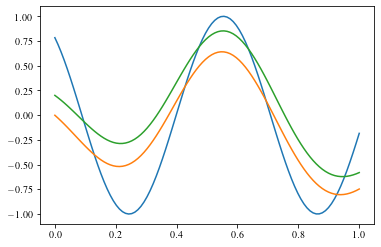

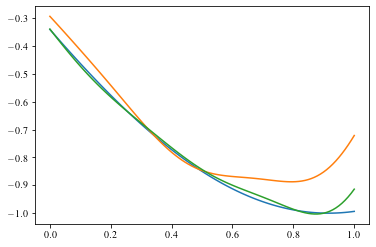

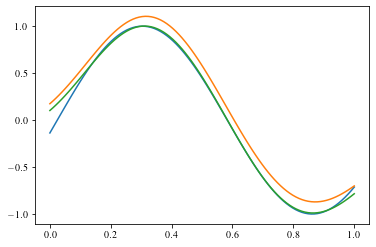

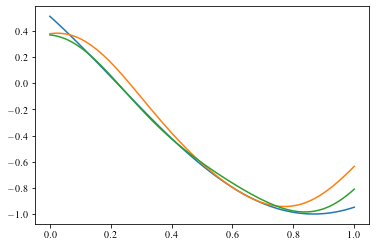

In [16]:
if m == 3:
    num = 50
    X, Y = np.meshgrid(1.2*np.linspace(-1, 1, num=num), 1.2*np.linspace(-1, 1, num=num) + .5)

    fig1 = plt.figure()
    ax = fig1.add_subplot(111, projection='3d')
    # Plot signal and current reconstruction
    ax.plot(y_test[:, 0], y_test[:, 1], y_test[:, 2], c='C0')
    ax.plot(y_pred[:, 0], y_pred[:, 1], y_pred[:, 2], c='C1')
    # ax.scatter(y_train[i, 0], y_train[i, 1], y_train[i, 2])
    # ax.scatter(y_pred[i, 0], y_pred[i, 1], y_pred[i, 2])

    # # Plot the hyperplane <u; (X, Y, Z)> = <u; y_pred>
    # Z = - u[i, 0] * X
    # Z -= u[i, 1] * Y
    # Z += np.dot(y_pred[i], u[i])
    # Z /= u[i, 2]
    # ax.plot_surface(X, Y, Z, alpha=.5)

for i in range(m):
    fig, axes = plt.subplots(1, 1)
    axes.plot(x_test, y_test[:, i])
    axes.plot(x_test, y_pred[:, i])
    axes.plot(x_test, y_pred_coor[:, i])